In [13]:
from statsmodels.tsa.arima_model import ARIMA
import pandas as pd
import numpy as np
from collections import OrderedDict
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from datetime import datetime, timedelta

In [14]:
import os, sys
sys.path.append(os.getcwd())

In [15]:
from _element import feature_control as ft_c
from _element import varr
from _element import calculations as calc
from _element.result_control import Result

from _alg.prophet import Prophet_timeseries
from _alg.arima import Arima_timeseries

from _evaluation.cross_validation import Cross_Validation
from _evaluation import compare

In [16]:
INPUT_FILENAME= 'KPP일별투입(10_17)_withcompanycode.xlsx'

In [17]:
df_raw= ft_c.xlsx_opener(varr.PJ_DIR+varr.DF_DIR, INPUT_FILENAME)
df_temp= ft_c.xlsx_opener(varr.PJ_DIR+varr.TEMP_DATA_DIR, 'temp_data_merged.xlsx')

In [18]:
y_col= df_raw['raw'].columns.values.tolist()

In [19]:
try:
    y_col.remove('ds')
except ValueError:
    pass

In [20]:
x_col= df_temp['raw'].columns.values.tolist()

In [21]:
df_raw['raw']['ds']= pd.to_datetime(df_raw['raw']['ds'], box=True, format= '%Y/%m/%d', exact=True)
df_temp['raw']['ds']= pd.to_datetime(df_temp['raw']['ds'], box=True, format= '%Y/%m/%d', exact=True)
df_raw['raw']= pd.merge(df_raw['raw'], df_temp['raw'], how='inner', on='ds')

In [22]:
ft_c.divide_multiple_y(df_raw, 'raw', y_col, x_col)

In [23]:
df_raw

{227645:              ds   temp_max   temp_min  rain_amount     y
 0    2010-07-01  30.500000  24.900000          0.0   512
 1    2010-07-02  25.799999  22.700001         70.0   992
 2    2010-07-03  25.600000  22.600000          1.0   512
 3    2010-07-04  29.700001  23.100000          0.0     0
 4    2010-07-05  30.600000  21.799999          0.0  1204
 5    2010-07-06  31.000000  22.400000          0.0  1024
 6    2010-07-07  29.600000  21.900000          0.0  1792
 7    2010-07-08  29.000000  21.299999          0.0  2032
 8    2010-07-09  29.299999  21.799999          0.0  1456
 9    2010-07-10  29.100000  22.900000          0.0   512
 10   2010-07-11  25.900000  21.000000          0.0     0
 11   2010-07-12  28.299999  22.200001          0.0  1472
 12   2010-07-13  31.299999  21.900000          0.0  1408
 13   2010-07-14  27.500000  22.700001          1.0  1168
 14   2010-07-15  29.799999  24.299999          0.0   512
 15   2010-07-16  27.100000  21.700001         52.0   448
 16   

In [24]:
arima= Arima_timeseries()

lag 0: corr 1.0
lag 7: corr 0.6283476618636424
lag 357: corr 0.5874529933794431
lag 364: corr 0.5806461038936168
lag 14: corr 0.5750943668282587
lag 350: corr 0.5339669096996941
lag 21: corr 0.51972968660716
lag 28: corr 0.5037868894602766
lag 343: corr 0.4883535348416609
lag 1: corr 0.46198505276768603
lag 336: corr 0.45359684435039505
lag 35: corr 0.45331565112134087
lag 329: corr 0.43061808794185136
lag 42: corr 0.4164298765570115
lag 322: corr 0.4024076260562392
lag 49: corr 0.38618686133125746
lag 358: corr 0.3850362483264199
lag 8: corr 0.3799994652384224
lag 6: corr 0.3785548176626038
lag 56: corr 0.36856118846358915
lag 3: corr 0.36311340578004453
lag 315: corr 0.3620816480231004
lag 13: corr 0.35969532751500566
lag 356: corr 0.35059140112225606
lag 4: corr 0.34442799522177353
lag 363: corr 0.34285604861777585
lag 2: corr 0.3420816589402483
lag 15: corr 0.3391913342549458
lag 308: corr 0.3337715264310909
lag 351: corr 0.3304935533865053
lag 63: corr 0.31826156739715755
lag 10: 

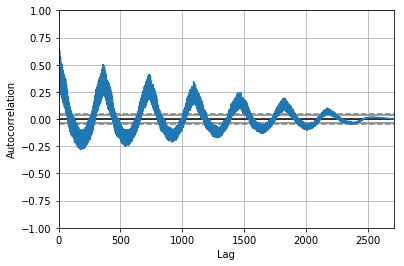

In [25]:
arima.corr_check(df_raw[230054]['y'])

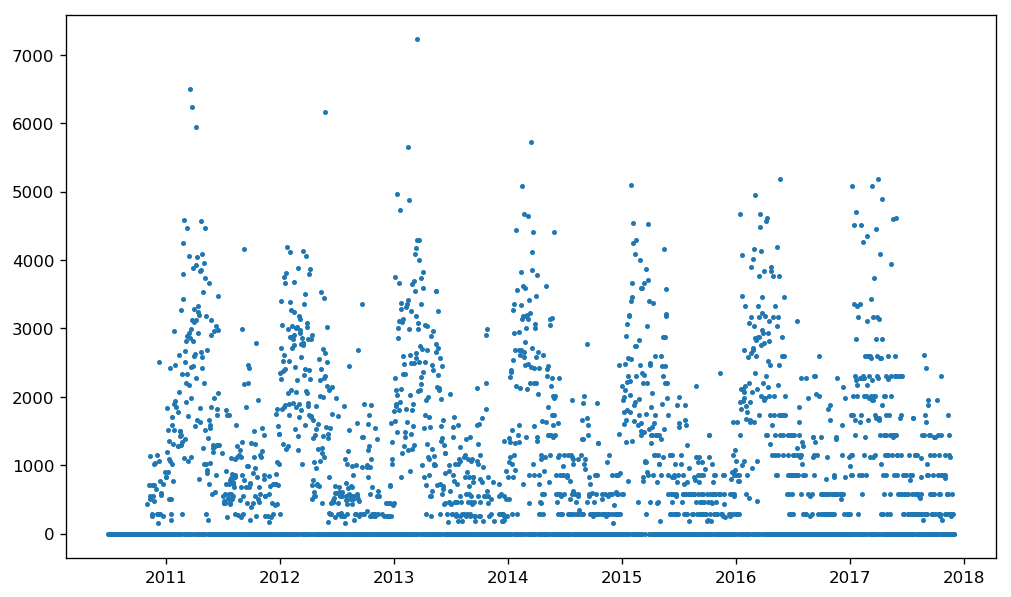

In [26]:
arima.plot(df_raw[230054]['ds'], df_raw[230054]['y'])

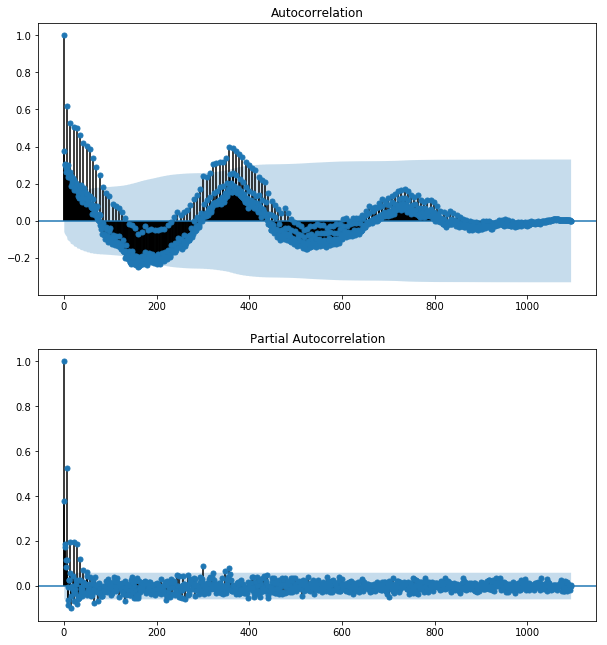

In [27]:
arima.acf_plot(df_raw[230054]['y'])

In [28]:
df_raw[230054]['y'].tail(15)

2695     288
2696     288
2697    1120
2698       0
2699     288
2700     252
2701       0
2702       0
2703     576
2704     288
2705       0
2706       0
2707     288
2708       0
2709       0
Name: y, dtype: int64

In [29]:
df_diff= arima.diff(df_raw[230054]['y'], 7, '7days_diff')

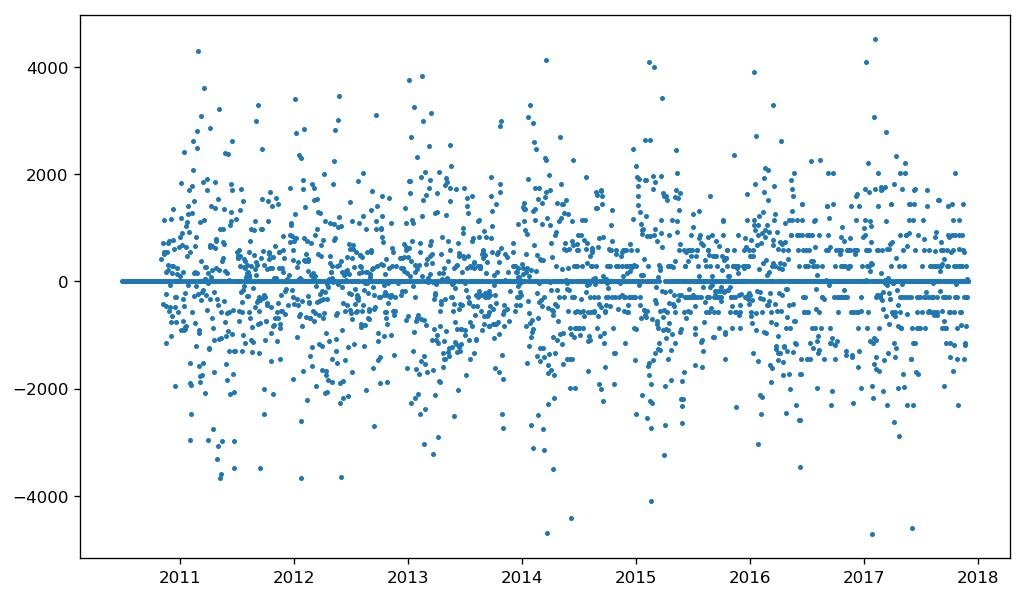

In [30]:
arima.plot(df_raw[230054]['ds'], df_diff)

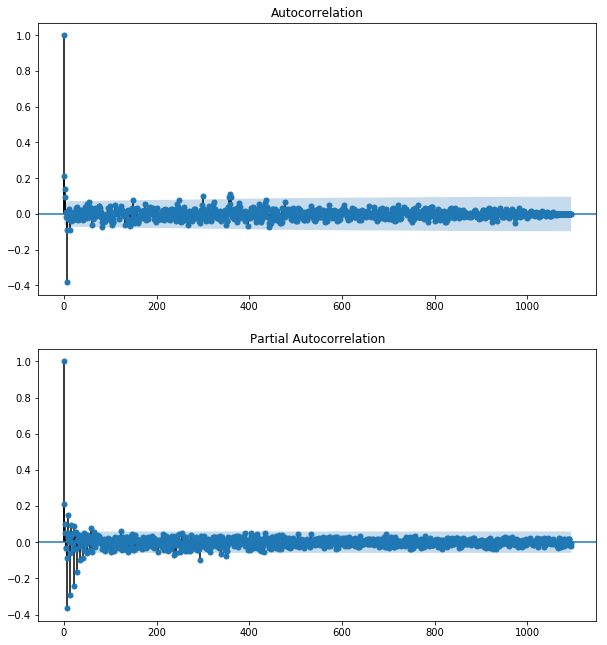

In [31]:
arima.acf_plot(df_diff)

lag 0: corr 1.0
lag 1: corr 0.2205858358029559
lag 2: corr 0.13510434780429506
lag 3: corr 0.08498603944458608
lag 357: corr 0.0756178372853095
lag 247: corr 0.0734226215792238
lag 355: corr 0.07230848594677429
lag 356: corr 0.06510574426724232
lag 283: corr 0.060060648833729954
lag 249: corr 0.05627609624912949
lag 301: corr 0.052340532191297945
lag 40: corr 0.05182973462394174
lag 68: corr 0.05137638327171076
lag 358: corr 0.04927678536565745
lag 54: corr 0.048443343611181945
lag 28: corr 0.046556377169360424
lag 244: corr 0.044987968119225875
lag 148: corr 0.04487215944412196
lag 298: corr 0.04419954985162939
lag 136: corr 0.0439762649097348
lag 192: corr 0.042790727101520744
lag 56: corr 0.04252666137214622
lag 45: corr 0.04168113700811448
lag 304: corr 0.041259538936372395
lag 51: corr 0.041007580127134735
lag 359: corr 0.04010552645582529
lag 163: corr 0.03820527687424001
lag 248: corr 0.03793839324191034
lag 360: corr 0.035651072950157806
lag 12: corr 0.035081584876312105
lag 32

lag 363: corr -0.01605481281933936
lag 49: corr -0.016107884695390245
lag 74: corr -0.016206112525676553
lag 78: corr -0.016244676824666654
lag 273: corr -0.016450705433523945
lag 226: corr -0.01662565945048155
lag 84: corr -0.01669469462125755
lag 332: corr -0.016985600593932015
lag 262: corr -0.01711407340549552
lag 197: corr -0.017143266265200463
lag 183: corr -0.01718074539245081
lag 336: corr -0.017232170001007116
lag 10: corr -0.017503321780446352
lag 73: corr -0.017523464928187137
lag 352: corr -0.017807366080913052
lag 35: corr -0.018127269246337174
lag 32: corr -0.018394764842443838
lag 341: corr -0.01881752165986418
lag 227: corr -0.01889448505541808
lag 154: corr -0.019402988104771486
lag 160: corr -0.019504562998826774
lag 171: corr -0.019838235532540705
lag 159: corr -0.01987601319272728
lag 315: corr -0.02081583609347776
lag 237: corr -0.021617365241993116
lag 89: corr -0.02186615139952805
lag 82: corr -0.02203057907572563
lag 179: corr -0.022650352871626617
lag 101: corr

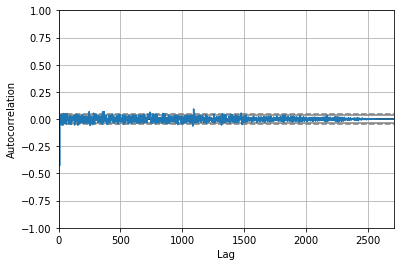

In [32]:
arima.corr_check(df_diff)

In [68]:
arima_model= ARIMA(x_arr, order= (0, 1, 1))
model_fit= model.fit(trend= 'c', full_output= True, disp= 1)
print(model_fit.summary())

TypeError: unsupported operand type(s) for -: 'int' and 'datetime.datetime'

In [64]:
df_raw[230054]['ds']= df_raw[230054]['ds'].apply(lambda x: x.to_pydatetime())
x_arr= np.asarray(df_raw[230054][['ds', 'y']])

In [65]:
df_raw[230054]['ds'].dtype

dtype('<M8[ns]')

In [66]:
x_arr[:, 0]= list(map((lambda x: x.to_pydatetime()), x_arr[:, 0]))

In [67]:
x_arr

array([[datetime.datetime(2010, 7, 1, 0, 0), 0],
       [datetime.datetime(2010, 7, 2, 0, 0), 0],
       [datetime.datetime(2010, 7, 3, 0, 0), 0],
       ..., 
       [datetime.datetime(2017, 11, 28, 0, 0), 288],
       [datetime.datetime(2017, 11, 29, 0, 0), 0],
       [datetime.datetime(2017, 11, 30, 0, 0), 0]], dtype=object)

In [72]:
datetime(x_arr[0,0])

TypeError: an integer is required (got type datetime.datetime)